## HomeExchange Subscriptions cleaning and data exploration

## Overview


## Objectives

## Steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import glob

#### The dataset 

In [2]:
subscriptions = pd.read_csv(r"C:\Users\imane\OneDrive\Desktop\home_exchange\HomeExchange\data\subscriptions.csv")
subscriptions.head()

,subscription_date,user_id,renew,first_subscription_date,first_subscription,referral,promotion,payment3x,payment2,payment3,diff_year
0,2019-01-01,2062530,1,2018-01-01,0,0,0,0,0,0,1
1,2019-01-02,1177188,1,2007-04-14,0,0,0,0,0,0,12
2,2019-01-03,2803569,0,2018-01-07,0,0,0,0,0,0,1
3,2019-01-03,2656379,1,2018-01-03,0,0,0,0,0,0,1
4,2019-01-05,2252650,0,2014-05-01,0,0,0,0,0,0,5


#### Checking for null values 

In [3]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99702 entries, 0 to 99701
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   subscription_date        99702 non-null  object
 1   user_id                  99702 non-null  int64 
 2   renew                    99702 non-null  int64 
 3   first_subscription_date  99702 non-null  object
 4   first_subscription       99702 non-null  int64 
 5   referral                 99702 non-null  int64 
 6   promotion                99702 non-null  int64 
 7   payment3x                99702 non-null  int64 
 8   payment2                 99702 non-null  int64 
 9   payment3                 99702 non-null  int64 
 10  diff_year                99702 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 8.4+ MB


In [4]:
subscriptions.isnull().sum()

subscription_date          0
user_id                    0
renew                      0
first_subscription_date    0
first_subscription         0
referral                   0
promotion                  0
payment3x                  0
payment2                   0
payment3                   0
diff_year                  0
dtype: int64

In [5]:
subscriptions.duplicated().sum()

0

#### Changing data types 

In [6]:
subscriptions["subscription_date"] = pd.to_datetime(subscriptions["subscription_date"])
subscriptions["first_subscription_date"] = pd.to_datetime(subscriptions["first_subscription_date"])

#### Grouping the dataframe 

In [7]:
sub_grouped = subscriptions.groupby("user_id").agg({'subscription_date': ['min','max',"count"],
                                                   "renew":"last", "first_subscription_date":"first",
                                                   "first_subscription":"last","referral":"first",
                                                   "promotion":"first","payment3x":"first",
                                                   "payment2":"last","payment3":"last"})

In [8]:
sub_grouped = sub_grouped.reset_index()

In [9]:
sub_grouped.columns = sub_grouped.columns.map('_'.join)

In [10]:
sub_grouped.columns

Index(['user_id_', 'subscription_date_min', 'subscription_date_max',
       'subscription_date_count', 'renew_last',
       'first_subscription_date_first', 'first_subscription_last',
       'referral_first', 'promotion_first', 'payment3x_first', 'payment2_last',
       'payment3_last'],
      dtype='object')

#### Histograms 

<Axes: xlabel='renew_last', ylabel='Count'>

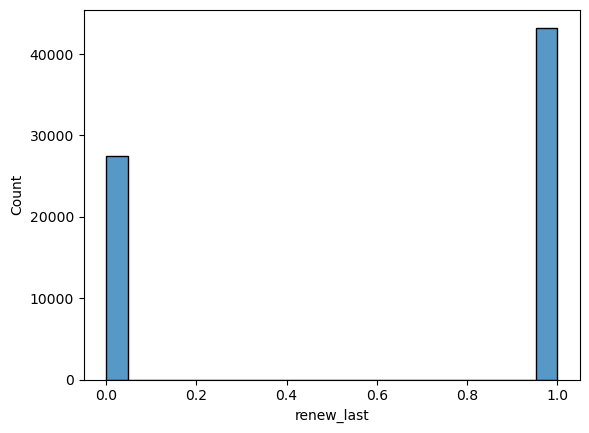

In [11]:
sns.histplot(sub_grouped, x = "renew_last")


<Axes: xlabel='first_subscription_last', ylabel='Count'>

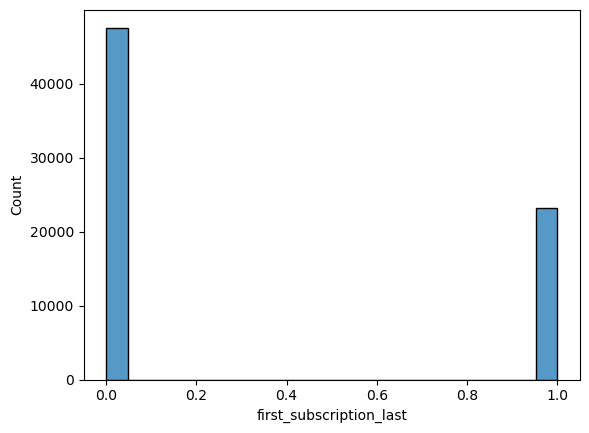

In [12]:
sns.histplot(sub_grouped, x = "first_subscription_last")


<Axes: xlabel='referral_first', ylabel='Count'>

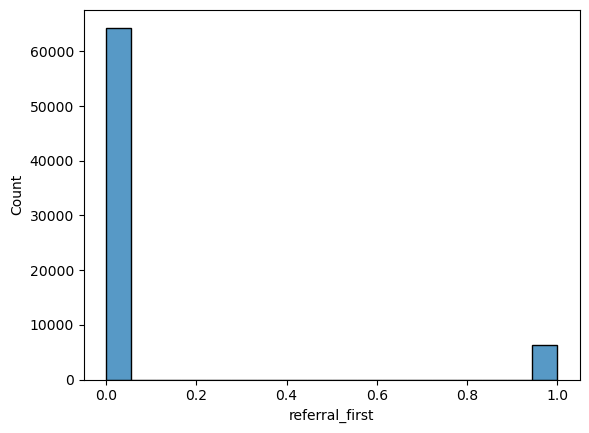

In [13]:
sns.histplot(sub_grouped, x = "referral_first")

<Axes: xlabel='promotion_first', ylabel='Count'>

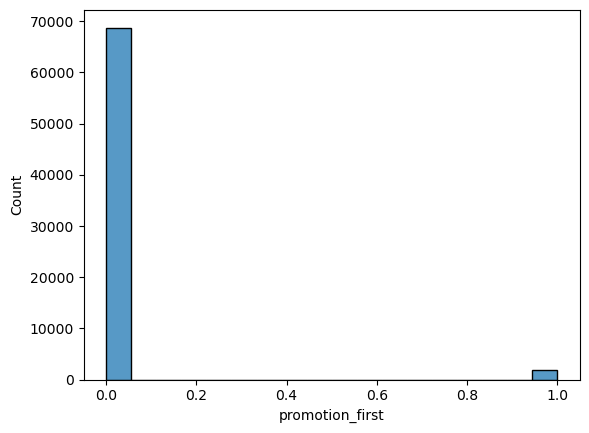

In [14]:
sns.histplot(sub_grouped, x = "promotion_first")

<Axes: xlabel='payment3x_first', ylabel='Count'>

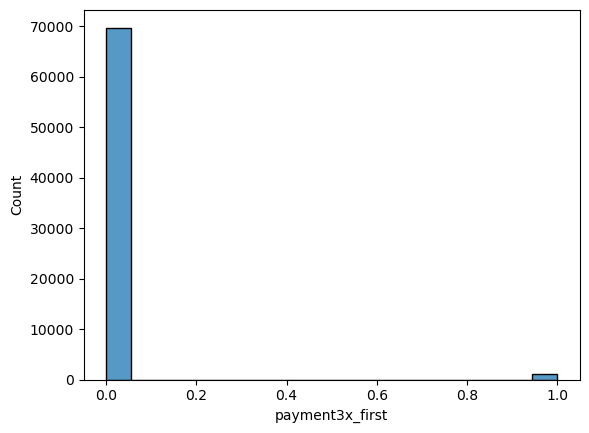

In [15]:
sns.histplot(sub_grouped, x = "payment3x_first")

<Axes: xlabel='payment2_last', ylabel='Count'>

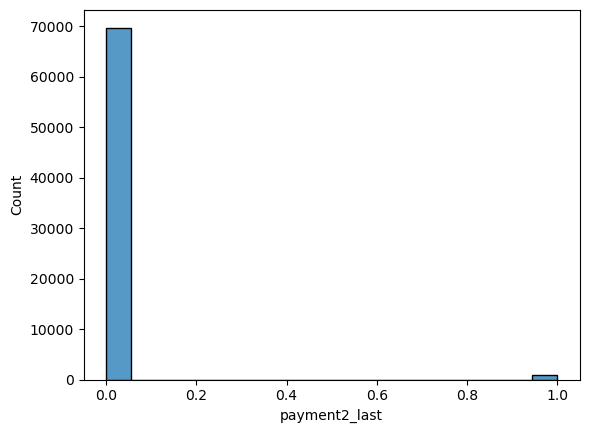

In [16]:
sns.histplot(sub_grouped, x = "payment2_last")

<Axes: xlabel='payment3_last', ylabel='Count'>

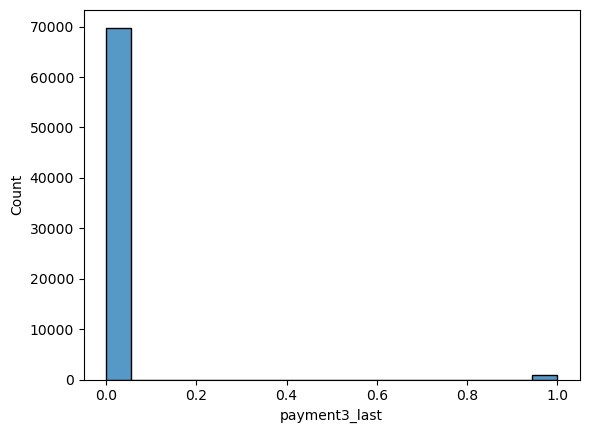

In [17]:
sns.histplot(sub_grouped, x = "payment3_last")

#### Descriptive statistics 

In [18]:
sub_grouped[['renew_last',
        'first_subscription_last',
       'referral_first', 'promotion_first', 'payment3x_first', 'payment2_last',
       'payment3_last']].describe()

,renew_last,first_subscription_last,referral_first,promotion_first,payment3x_first,payment2_last,payment3_last
count,70726.000000,70726.000000,70726.000000,70726.000000,70726.000000,70726.000000,70726.000000
mean,0.611515,0.327249,0.090320,0.027670,0.014422,0.013460,0.012923
std,0.487409,0.469212,0.286642,0.164027,0.119223,0.115236,0.112944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
